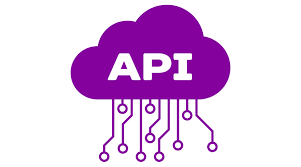

### API
API stands for Application Programming Interface. In the context of APIs, the word Application refers to any software with a distinct function. Interface can be thought of as a contract of service between two applications. This contract defines how the two communicate with each other using requests and responses

### Testing the COin Market Cap API 

In [2]:
import json
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'

parameters = {
    'start': '1',
    'limit': '5000',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '6346d357-bb69-4119-9b8c-bffd2343dbc6'
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params = parameters)
    data = json.loads(response.text)

    print(data)

except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2024-05-08T14:59:13.244Z', 'error_code': 0, 'error_message': None, 'elapsed': 72, 'credit_count': 25, 'notice': None, 'total_count': 9917}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11025, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6]:
data

{'status': {'timestamp': '2024-05-08T14:59:13.244Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 72,
  'credit_count': 25,
  'notice': None,
  'total_count': 9917},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 11025,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfoli

In [8]:
# Normalizing the json Data to make it a bit readable
import pandas as pd 
import numpy as np

crypto_df = pd.json_normalize(data['data'])

In [18]:
pd.set_option('display.max_columns', None)
crypto_df.head()
crypto_df.info()
sub_df = crypto_df.copy()[['name','quote.USD.price']]
sub_df.rename(columns={'quote.USD.price': 'value_usd'}, inplace=True)

sub_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   name                                5000 non-null   object 
 2   symbol                              5000 non-null   object 
 3   slug                                5000 non-null   object 
 4   num_market_pairs                    5000 non-null   int64  
 5   date_added                          5000 non-null   object 
 6   tags                                5000 non-null   object 
 7   max_supply                          3561 non-null   float64
 8   circulating_supply                  5000 non-null   float64
 9   total_supply                        5000 non-null   object 
 10  infinite_supply                     5000 non-null   bool   
 11  platform                            0 non-n

name     value_usd
0      Bitcoin  62597.133523
1     Ethereum   3020.874333
2  Tether USDt      0.999749
3          BNB    585.682400
4       Solana    148.161112

In [21]:
sub_df.sort_values(by = ['value_usd'], ascending=False)

name     value_usd
3185              Bitcoin TRC20  6.332089e+04
3746          Chain-key Bitcoin  6.304338e+04
2759         BITCOIN ADDITIONAL  6.265515e+04
2593  Bitcoin Avalanche Bridged  6.264582e+04
204                Bitcoin BEP2  6.260754e+04
...                         ...           ...
4078                     Hebeto  1.705634e-16
3542                  ShibaDoge  3.499640e-17
4999                KTK project  6.998422e-18
4516                        SEC  1.003963e-18
3967                 ELON’S CAT  0.000000e+00

[5000 rows x 2 columns]

In [22]:
import urllib.request
url = 'https://open.africa/api/3/action/datastore_search?resource_id=fb5b64ca-572f-4344-be6a-0ca5d9b2ae20&limit=5&q=title:jones'  
fileobj = urllib.request.urlopen(url)
print(fileobj.read())

b'{"help": "https://open.africa/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "limit": 5, "q": "title:jones", "records_format": "objects", "resource_id": "fb5b64ca-572f-4344-be6a-0ca5d9b2ae20", "total_estimation_threshold": null, "records": [], "fields": [{"id": "_id", "type": "int"}, {"id": "sensor_id", "type": "numeric"}, {"id": "sensor_type", "type": "text"}, {"id": "location", "type": "numeric"}, {"id": "lat", "type": "numeric"}, {"id": "lon", "type": "numeric"}, {"id": "timestamp", "type": "timestamp"}, {"id": "value_type", "type": "text"}, {"id": "value", "type": "numeric"}, {"id": "rank", "type": "float"}], "_links": {"start": "/api/3/action/datastore_search?resource_id=fb5b64ca-572f-4344-be6a-0ca5d9b2ae20&limit=5&q=title%3Ajones", "next": "/api/3/action/datastore_search?resource_id=fb5b64ca-572f-4344-be6a-0ca5d9b2ae20&limit=5&q=title%3Ajones&offset=5"}, "total": 0, "total_was_estimated": false}}'
